In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# read data
file_path = 'JinjiangBooks.csv'
data = pd.read_csv(file_path)

# check the head
print(data.head())


   book_id book_name author  NonVIP_average_click  reviews_num  collected_num  \
0   113782    婆娑（GL）    暮成雪               28628.0       2946.0         6261.0   
1   113783     最后的童话     孤*                 511.0         18.0            0.0   
2   113784       梧桐雨    小翎子                 248.0          0.0            0.0   
3   113786   我拿什么来爱你    黑玻璃                 234.0          1.0            2.0   
4   113788  天上的秋千不寂寞   北方之北                 228.0          0.0            0.0   

   nutrient_num   credits          genre perspective  progress  \
0         475.0  83095680  原创-百合-近代现代-爱情          主受         1   
1           0.0    188633  原创-言情-近代现代-奇幻          女主         1   
2           0.0     56872  原创-言情-幻想未来-奇幻          女主         0   
3           0.0    223842  原创-纯爱-古色古香-爱情          主受         0   
4           0.0     24180  原创-言情-幻想未来-爱情          女主         1   

   contract_status  chapter_launch_time  total_word_count  
0                1  2006-12-16 10:24:42            21974

In [68]:
# 处理空缺信息，包括数字，日期，分类，视角
# Handle missing numeric data and fill it with 0
num_cols = ['NonVIP_average_click', 'reviews_num', 'collected_num', 'nutrient_num', 'credits', 'progress', 'contract_status', 'total_word_count']
data[num_cols] = data[num_cols].fillna(0)

# Missing values in the category type field are filled with "NONE"
cat_cols = ['genre', 'perspective']
data[cat_cols] = data[cat_cols].fillna('NONE')

# Handle date fields, missing or "Error" replaced with "0000-00-00 00:00:00"
data['chapter_launch_time'] = data['chapter_launch_time'].replace('Error', '0000-00-00 00:00:00').fillna('0000-00-00 00:00:00')

# Check the results after data preprocessing
print(data.head())

# Proceeding to model training and evaluation steps


   book_id book_name author  NonVIP_average_click  reviews_num  collected_num  \
0   113782    婆娑（GL）    暮成雪               28628.0       2946.0         6261.0   
1   113783     最后的童话     孤*                 511.0         18.0            0.0   
2   113784       梧桐雨    小翎子                 248.0          0.0            0.0   
3   113786   我拿什么来爱你    黑玻璃                 234.0          1.0            2.0   
4   113788  天上的秋千不寂寞   北方之北                 228.0          0.0            0.0   

   nutrient_num   credits          genre perspective  progress  \
0         475.0  83095680  原创-百合-近代现代-爱情          主受         1   
1           0.0    188633  原创-言情-近代现代-奇幻          女主         1   
2           0.0     56872  原创-言情-幻想未来-奇幻          女主         0   
3           0.0    223842  原创-纯爱-古色古香-爱情          主受         0   
4           0.0     24180  原创-言情-幻想未来-爱情          女主         1   

   contract_status  chapter_launch_time  total_word_count  
0                1  2006-12-16 10:24:42            21974

In [69]:
# 处理分类
# Break the genre column into subcolumns
data['genre'] = data['genre'].fillna('无-无-无-无')  # Fill in missing values first to ensure no errors in decomposition
expanded_genres = data['genre'].str.split('-', expand=True)

# Name the decomposed columns to ensure that no errors occur even if some columns do not exist
genre_columns = ['top_genre', 'sub_genre1', 'sub_genre2', 'sub_genre3']
for i, col in enumerate(genre_columns):
    if i < expanded_genres.shape[1]:  # Check whether the number of columns decomposed is sufficient
        data[col] = expanded_genres[i].fillna('无')  # Fill in possible missing values
    else:
        data[col] = '无'  # If there is no decomposed column at that position, populate 'None'

# Convert new categorical columns to one-hot encoding format
data = pd.get_dummies(data, columns=genre_columns)

# check result
print(data.head())

   book_id book_name author  NonVIP_average_click  reviews_num  collected_num  \
0   113782    婆娑（GL）    暮成雪               28628.0       2946.0         6261.0   
1   113783     最后的童话     孤*                 511.0         18.0            0.0   
2   113784       梧桐雨    小翎子                 248.0          0.0            0.0   
3   113786   我拿什么来爱你    黑玻璃                 234.0          1.0            2.0   
4   113788  天上的秋千不寂寞   北方之北                 228.0          0.0            0.0   

   nutrient_num   credits          genre perspective  ...  sub_genre3_悬疑  \
0         475.0  83095680  原创-百合-近代现代-爱情          主受  ...          False   
1           0.0    188633  原创-言情-近代现代-奇幻          女主  ...          False   
2           0.0     56872  原创-言情-幻想未来-奇幻          女主  ...          False   
3           0.0    223842  原创-纯爱-古色古香-爱情          主受  ...          False   
4           0.0     24180  原创-言情-幻想未来-爱情          女主  ...          False   

   sub_genre3_惊悚 sub_genre3_无  sub_genre3_武侠  sub_genre3

In [70]:
# 处理视角
# If there are missing values in the 'perspective' column, fill them first
data['perspective'] = data['perspective'].fillna('无')

# One-hot encoding using get_dummies
perspective_dummies = pd.get_dummies(data['perspective'], prefix='perspective')

# Concatenate the resulting one-hot encoded DataFrame back to the original DataFrame
data = pd.concat([data, perspective_dummies], axis=1)

# The original 'perspective' column can now be removed as it has been replaced by one-hot encoding
data.drop('perspective', axis=1, inplace=True)

# Check the data to confirm that the one-hot encoding column has been added correctly
print(data.head())


   book_id book_name author  NonVIP_average_click  reviews_num  collected_num  \
0   113782    婆娑（GL）    暮成雪               28628.0       2946.0         6261.0   
1   113783     最后的童话     孤*                 511.0         18.0            0.0   
2   113784       梧桐雨    小翎子                 248.0          0.0            0.0   
3   113786   我拿什么来爱你    黑玻璃                 234.0          1.0            2.0   
4   113788  天上的秋千不寂寞   北方之北                 228.0          0.0            0.0   

   nutrient_num   credits          genre  progress  ...  sub_genre3_童话  \
0         475.0  83095680  原创-百合-近代现代-爱情         1  ...          False   
1           0.0    188633  原创-言情-近代现代-奇幻         1  ...          False   
2           0.0     56872  原创-言情-幻想未来-奇幻         0  ...          False   
3           0.0    223842  原创-纯爱-古色古香-爱情         0  ...          False   
4           0.0     24180  原创-言情-幻想未来-爱情         1  ...          False   

  sub_genre3_西方衍生  sub_genre3_轻小说  perspective_NONE  perspective_不明 

In [71]:
# 检查 'credits' 列中的非数值数据
# 这将打印出所有 'credits' 列中的非数值行
invalid_credits = pd.to_numeric(data['credits'], errors='coerce').isna()
print(data[invalid_credits])

# 选择如何处理这些行：可以选择删除它们，或者替换为合理的数值
# 例如，这里我们选择将它们替换为0
data.loc[invalid_credits, 'credits'] = 0

# 确保 'credits' 列是数值类型
data['credits'] = pd.to_numeric(data['credits'])

Empty DataFrame
Columns: [book_id, book_name, author, NonVIP_average_click, reviews_num, collected_num, nutrient_num, credits, genre, progress, contract_status, chapter_launch_time, total_word_count, top_genre_, top_genre_原创, top_genre_未知, top_genre_衍生, top_genre_评论, top_genre_诗歌, top_genre_随笔, sub_genre1_, sub_genre1_女尊, sub_genre1_无, sub_genre1_无CP, sub_genre1_百合, sub_genre1_纯爱, sub_genre1_言情, sub_genre2_, sub_genre2_古色古香, sub_genre2_幻想未来, sub_genre2_无, sub_genre2_架空历史, sub_genre2_近代现代, sub_genre3_, sub_genre3_东方衍生, sub_genre3_仙侠, sub_genre3_传奇, sub_genre3_其他衍生, sub_genre3_剧情, sub_genre3_古典衍生, sub_genre3_奇幻, sub_genre3_悬疑, sub_genre3_惊悚, sub_genre3_无, sub_genre3_武侠, sub_genre3_游戏, sub_genre3_爱情, sub_genre3_科幻, sub_genre3_童话, sub_genre3_西方衍生, sub_genre3_轻小说, perspective_NONE, perspective_不明, perspective_主受, perspective_主攻, perspective_互攻, perspective_女主, perspective_男主]
Index: []

[0 rows x 58 columns]


In [72]:
# 处理日期数据：将 'chapter_launch_time' 转换为距离最小日期的天数
data['chapter_launch_time'] = pd.to_datetime(data['chapter_launch_time'], errors='coerce')  # 转换日期，无效数据转为 NaT
min_date = data['chapter_launch_time'].min()  # 获取最小日期
data['days_from_min_date'] = (data['chapter_launch_time'] - min_date).dt.days  # 计算天数差
data.drop('chapter_launch_time', axis=1, inplace=True)  # 删除原始日期列

# 填充由于日期无效导致的缺失值
data['days_from_min_date'].fillna(0, inplace=True)  # 假设无效日期距离最小日期的天数为0

C:\Users\aaqqi\AppData\Local\Temp\ipykernel_18448\905966682.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['days_from_min_date'].fillna(0, inplace=True)  # 假设无效日期距离最小日期的天数为0


In [73]:
# 确保所有操作都正确执行
data.drop(['book_name', 'author', 'genre', 'book_id'], axis=1, inplace=True)

# 再次检查列名，确认删除操作成功
print(data.columns)


Index(['NonVIP_average_click', 'reviews_num', 'collected_num', 'nutrient_num',
       'credits', 'progress', 'contract_status', 'total_word_count',
       'top_genre_', 'top_genre_原创', 'top_genre_未知', 'top_genre_衍生',
       'top_genre_评论', 'top_genre_诗歌', 'top_genre_随笔', 'sub_genre1_',
       'sub_genre1_女尊', 'sub_genre1_无', 'sub_genre1_无CP', 'sub_genre1_百合',
       'sub_genre1_纯爱', 'sub_genre1_言情', 'sub_genre2_', 'sub_genre2_古色古香',
       'sub_genre2_幻想未来', 'sub_genre2_无', 'sub_genre2_架空历史', 'sub_genre2_近代现代',
       'sub_genre3_', 'sub_genre3_东方衍生', 'sub_genre3_仙侠', 'sub_genre3_传奇',
       'sub_genre3_其他衍生', 'sub_genre3_剧情', 'sub_genre3_古典衍生', 'sub_genre3_奇幻',
       'sub_genre3_悬疑', 'sub_genre3_惊悚', 'sub_genre3_无', 'sub_genre3_武侠',
       'sub_genre3_游戏', 'sub_genre3_爱情', 'sub_genre3_科幻', 'sub_genre3_童话',
       'sub_genre3_西方衍生', 'sub_genre3_轻小说', 'perspective_NONE',
       'perspective_不明', 'perspective_主受', 'perspective_主攻', 'perspective_互攻',
       'perspective_女主', 'perspective

In [74]:
import pandas as pd

# 假设 data 是您已经加载并处理好的 DataFrame
# 指定要保存的CSV文件路径
output_file_path = 'processed_data.csv'  # 修改为您希望保存文件的具体路径

# 将DataFrame保存到CSV
data.to_csv(output_file_path, index=False, encoding='utf-8-sig')

print(f"Data has been successfully saved to {output_file_path}")


Data has been successfully saved to processed_data.csv


In [75]:
# 打印列名，检查是否有拼写错误或未被删除的列
print(data.columns)

# 查看DataFrame的前几行，确认数据的当前状态
print(data.head())


Index(['NonVIP_average_click', 'reviews_num', 'collected_num', 'nutrient_num',
       'credits', 'progress', 'contract_status', 'total_word_count',
       'top_genre_', 'top_genre_原创', 'top_genre_未知', 'top_genre_衍生',
       'top_genre_评论', 'top_genre_诗歌', 'top_genre_随笔', 'sub_genre1_',
       'sub_genre1_女尊', 'sub_genre1_无', 'sub_genre1_无CP', 'sub_genre1_百合',
       'sub_genre1_纯爱', 'sub_genre1_言情', 'sub_genre2_', 'sub_genre2_古色古香',
       'sub_genre2_幻想未来', 'sub_genre2_无', 'sub_genre2_架空历史', 'sub_genre2_近代现代',
       'sub_genre3_', 'sub_genre3_东方衍生', 'sub_genre3_仙侠', 'sub_genre3_传奇',
       'sub_genre3_其他衍生', 'sub_genre3_剧情', 'sub_genre3_古典衍生', 'sub_genre3_奇幻',
       'sub_genre3_悬疑', 'sub_genre3_惊悚', 'sub_genre3_无', 'sub_genre3_武侠',
       'sub_genre3_游戏', 'sub_genre3_爱情', 'sub_genre3_科幻', 'sub_genre3_童话',
       'sub_genre3_西方衍生', 'sub_genre3_轻小说', 'perspective_NONE',
       'perspective_不明', 'perspective_主受', 'perspective_主攻', 'perspective_互攻',
       'perspective_女主', 'perspective

In [76]:
# 打印每列的数据类型
print(data.dtypes)


NonVIP_average_click    float64
reviews_num             float64
collected_num           float64
nutrient_num            float64
credits                   int64
progress                  int64
contract_status           int64
total_word_count          int64
top_genre_                 bool
top_genre_原创               bool
top_genre_未知               bool
top_genre_衍生               bool
top_genre_评论               bool
top_genre_诗歌               bool
top_genre_随笔               bool
sub_genre1_                bool
sub_genre1_女尊              bool
sub_genre1_无               bool
sub_genre1_无CP             bool
sub_genre1_百合              bool
sub_genre1_纯爱              bool
sub_genre1_言情              bool
sub_genre2_                bool
sub_genre2_古色古香            bool
sub_genre2_幻想未来            bool
sub_genre2_无               bool
sub_genre2_架空历史            bool
sub_genre2_近代现代            bool
sub_genre3_                bool
sub_genre3_东方衍生            bool
sub_genre3_仙侠              bool
sub_genr

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = 'processed_data.csv'  # 确保这是您数据文件的正确路径
data = pd.read_csv(file_path)
# 假设 data 是您已经正确处理的 DataFrame
# 准备输入特征X和目标变量y
X = data.drop('credits', axis=1)  # 移除目标变量列
y = data['credits']  # 目标变量

# 划分训练集和测试集，比例为80%训练，20%测试
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型实例
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算模型性能指标
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 输出模型性能
print("均方误差 (MSE):", mse)
print("决定系数 (R^2):", r2)


均方误差 (MSE): 483167887561478.5
决定系数 (R^2): 0.8832620976679912


In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 创建一个带有数据标准化步骤的管道
pipeline = make_pipeline(StandardScaler(), LinearRegression())

# 使用管道重新训练模型
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# 计算更新后的MSE和R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("更新后的均方误差 (MSE):", mse)
print("更新后的决定系数 (R^2):", r2)


更新后的均方误差 (MSE): 482728975870400.1
更新后的决定系数 (R^2): 0.8833681428573438


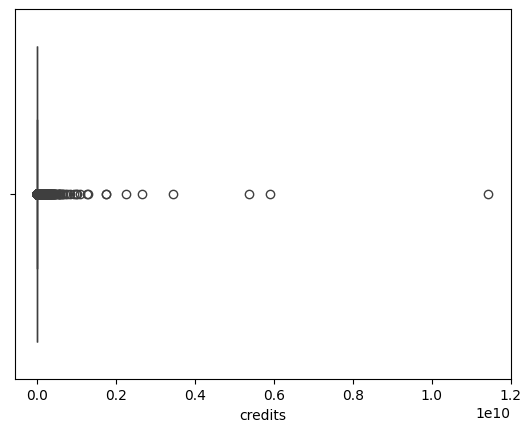

处理异常值后的均方误差 (MSE): 39745011006079.805
处理异常值后的决定系数 (R^2): 0.7694588753656595


In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# 可视化目标变量以查看是否有明显的异常值
sns.boxplot(x=data['credits'])
plt.show()

# 可以考虑剔除一些极端的异常值
q_low = data['credits'].quantile(0.01)
q_hi  = data['credits'].quantile(0.99)

filtered_data = data[(data['credits'] > q_low) & (data['credits'] < q_hi)]

# 重新划分数据
X_filtered = filtered_data.drop('credits', axis=1)
y_filtered = filtered_data['credits']

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("处理异常值后的均方误差 (MSE):", mse)
print("处理异常值后的决定系数 (R^2):", r2)


In [81]:
from sklearn.ensemble import RandomForestRegressor

# 使用随机森林模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("随机森林模型的均方误差 (MSE):", mse_rf)
print("随机森林模型的决定系数 (R^2):", r2_rf)


随机森林模型的均方误差 (MSE): 43509080720802.57
随机森林模型的决定系数 (R^2): 0.7476253711529798
